In [263]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


In [252]:
data= load_breast_cancer()

In [253]:
cancer_features = pd.DataFrame(data.data, columns = data.feature_names)
cancer_targets = pd.DataFrame(data.target,columns=['Target'])

In [255]:
cancer_features.shape

(569, 30)

In [256]:
train_sizes = [50, 100, 200, 300, 455]

#learning curve
train_sizes, train_scores, validation_scores, = learning_curve(
estimator=LogisticRegression(max_iter=1000, C=100, solver='liblinear', penalty='l1'),
X = cancer_features,
y = cancer_targets, 
train_sizes=train_sizes, 
cv=5,
scoring='f1',
shuffle=True
)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

In [257]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


Training scores:

 [[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.99628253 1.         0.992      1.         0.9924812 ]
 [0.9867374  0.9893617  0.98924731 1.         0.997543  ]
 [0.99478261 0.991274   0.98954704 0.99124343 0.98606272]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.90322581 0.95714286 0.90780142 0.92715232 0.91549296]
 [0.95104895 0.95104895 0.96453901 0.93706294 0.93617021]
 [0.94285714 0.96551724 0.97142857 0.95774648 0.96350365]
 [0.92753623 0.95104895 0.96598639 0.94285714 0.96503497]
 [0.95774648 0.97183099 0.97959184 0.97902098 0.98591549]]


In [258]:
training_scores_df = pd.DataFrame(train_scores, columns=['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5'], index=train_sizes)

In [259]:
training_scores_mean = training_scores_df.mean(axis=1)

In [260]:
validation_scores_df = pd.DataFrame(validation_scores, columns=['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5'], index=train_sizes)

In [261]:
validation_scores_mean = validation_scores_df.mean(axis=1)
print(training_scores_mean)
print(validation_scores_mean)

50     1.000000
100    1.000000
200    0.996153
300    0.992578
455    0.990582
dtype: float64
50     0.922163
100    0.947974
200    0.960211
300    0.950493
455    0.974821
dtype: float64


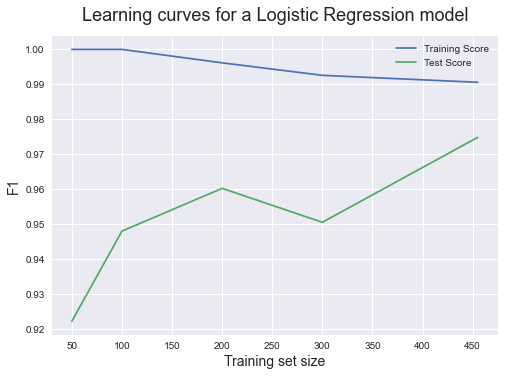

In [262]:
#plotting learning curve
plt.style.use('seaborn')
plt.plot(train_sizes, training_scores_mean, label = 'Training Score')
plt.plot(train_sizes, validation_scores_mean, label = 'Test Score')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic Regression model', fontsize = 18, y = 1.03)
plt.legend()


C=100 = the most ideal since the slope of test score is higher compared to other c inputs indicating higher learning accuracy in proportion to higher test size.

The model is currently has high variance and low bias which is a sign of overfitting but the model has an accuracy of 97% so fuck that shit.